<a href="https://colab.research.google.com/github/Brian13Noble/GIS/blob/main/ps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE PURPOSE OF THE RESEARCH**
The main goal of the project is to examine the performance of NJ counties based on factors such as life expectancy, population, race, health behaviors, rate of premature deaths, and number of healthcare providers   

In [252]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
#!pip install geopandas matplotlib folium

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [253]:
!pip install mapclassify
import mapclassify #need for thematic map classification

'Additional Measure Data.xlsx'	 County_Boundaries_of_NJ.shx   nj_counties.zip
 co-est2022-pop-34.xlsx		 County_Boundaries_of_NJ.xml  'NJ-diet and excercise.csv'
 County_Boundaries_of_NJ.cpg	'Health Care Providers.csv'    sample_data
 County_Boundaries_of_NJ.dbf	'Health insurance.csv'	       sty.jpg
 County_Boundaries_of_NJ.prj	'health sub_rankings.xlsx'
 County_Boundaries_of_NJ.shp	 nj_counties0.zip


<Axes: >

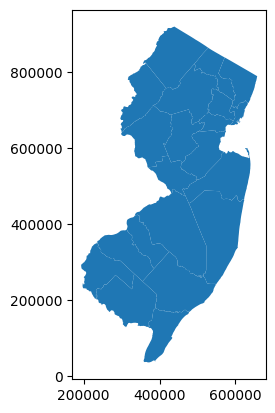

In [254]:
! wget -q -O nj_counties.zip https://github.com/Brian13Noble/GIS/raw/main/County_Boundaries_of_N.zip
!ls
zip_ref = zipfile.ZipFile('/content/nj_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
nj_counties=gpd.read_file('/content/County_Boundaries_of_NJ.shp') #load the shapefile with gpd as nj_counties

#Make the map
nj_counties.plot()


In [255]:
file_path = '/content/co-est2022-pop-34.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
    !wget -q https://github.com/Brian13Noble/GIS/raw/main/co-est2022-pop-34.xlsx

# Now read the Excel file into a DataFrame
nj_pop = pd.read_excel(file_path, skiprows=3)


In [256]:
#nj_counties.head(3)

In [257]:
nj_pop= nj_pop.dropna()
#nj_pop

In [258]:
nj_pop.drop(0, inplace=True)

In [259]:
nj_pop=nj_pop.round(0)

**New Jersey Population by County **

In [260]:
nj_pop

,Unnamed: 0,Unnamed: 1,2020,2021,2022
1,".Atlantic County, New Jersey",274536.00,274172.00,275130.00,275638.00
2,".Bergen County, New Jersey",955746.00,953617.00,954879.00,952997.00
3,".Burlington County, New Jersey",461863.00,461648.00,464411.00,466103.00
4,".Camden County, New Jersey",523486.00,523074.00,524124.00,524907.00
5,".Cape May County, New Jersey",95266.00,95040.00,95768.00,95634.00
6,".Cumberland County, New Jersey",154148.00,153692.00,152089.00,151356.00
7,".Essex County, New Jersey",862782.00,859924.00,854121.00,849477.00
8,".Gloucester County, New Jersey",302285.00,302554.00,304620.00,306601.00
9,".Hudson County, New Jersey",724857.00,721832.00,703447.00,703366.00
10,".Hunterdon County, New Jersey",128962.00,128786.00,129668.00,129777.00


In [261]:
nj_pop['Unnamed: 1'] = nj_pop['Unnamed: 1'].astype('int')
nj_pop[2020] = nj_pop[2020].astype('int')
nj_pop[2021] = nj_pop[2021].astype('int')
nj_pop[2022] = nj_pop[2022].astype('int')

nj_pop.rename(columns={'Unnamed: 0': 'County_name'}, inplace=True)
nj_pop.rename(columns={'Unnamed: 1': 'base_estimate'}, inplace=True)



In [262]:
nj_pop['County_name'] = nj_pop['County_name'].str.replace('County, New Jersey', '', regex=True)
nj_pop['County_name'] = nj_pop['County_name'].str.replace('^\.', '', regex=True)
nj_pop['County_name'] = nj_pop['County_name'].str.upper()

In [263]:
nj_pop['County_name'] = nj_pop['County_name'].str.lstrip()

In [264]:
nj_pop['County_name'] = nj_pop['County_name'].str.rstrip()

In [265]:
#nj_counties.dtypes

In [266]:
#nj_pop

In [267]:
# Merge shapefile with nj-population data
nj_counties = pd.merge(
    left=nj_counties,
    right=nj_pop,
    left_on='COUNTY',
    right_on='County_name',
    how='outer', indicator=True
)

In [268]:
nj_counties[['COUNTY','County_name','_merge']]

,COUNTY,County_name,_merge
0,ATLANTIC,ATLANTIC,both
1,BERGEN,BERGEN,both
2,BURLINGTON,BURLINGTON,both
3,CAMDEN,CAMDEN,both
4,CAPE MAY,CAPE MAY,both
5,CUMBERLAND,CUMBERLAND,both
6,ESSEX,ESSEX,both
7,GLOUCESTER,GLOUCESTER,both
8,HUDSON,HUDSON,both
9,HUNTERDON,HUNTERDON,both


In [269]:
#nj_counties.dtypes

In [270]:
!pip install imgkit
!sudo apt-get install wkhtmltopdf
import imgkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wkhtmltopdf is already the newest version (0.12.6-2).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [271]:
njcs = nj_counties[['COUNTY',2022]].sort_values(by=2022, ascending=False)
sty = njcs.style.background_gradient(cmap='RdYlGn')
sty

,COUNTY,2022
1,BERGEN,952997
20,MIDDLESEX,861418
6,ESSEX,849477
8,HUDSON,703366
12,OCEAN,655735
11,MONMOUTH,644098
17,UNION,569815
3,CAMDEN,524907
13,PASSAIC,513936
19,MORRIS,511151


QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

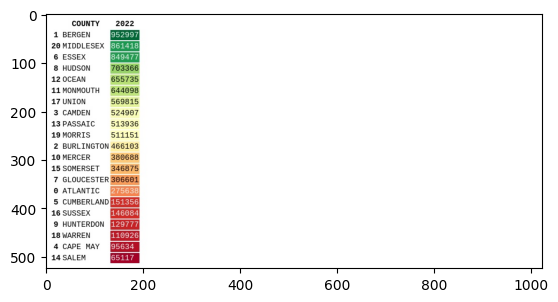

In [272]:
imgkit.from_string(sty.to_html(), 'sty.jpg')

import matplotlib.image as mpimg
img = mpimg.imread('sty.jpg')
plt.imshow(img)

<Axes: >

[]

[]

[]

[]

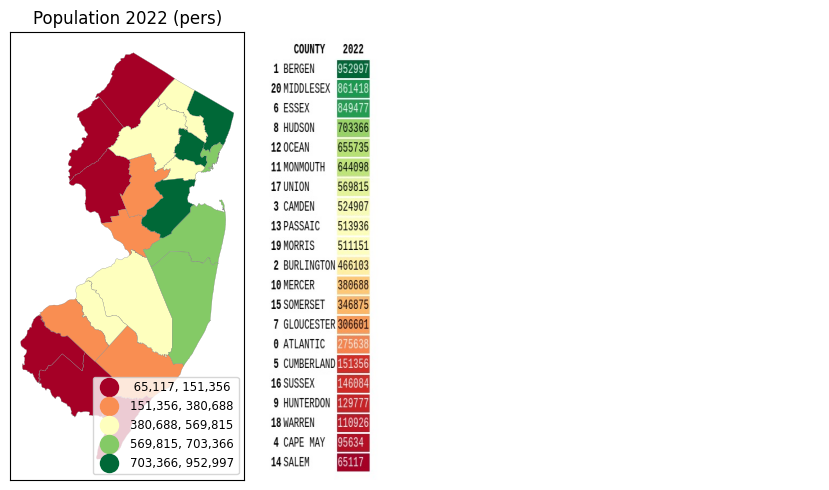

In [273]:
fig, axs = plt.subplots(1,2, figsize=(10,5),tight_layout=True)
nj_counties.plot(ax=axs[0],column= 2022,legend=True,cmap='RdYlGn',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population 2022 (pers)")
axs[0].set_xticks([]); axs[0].set_yticks([])

axs[1].imshow(img,aspect='auto') #,  extent=[0,1,0,1]  aspect=3.5
axs[1].set_axis_off()
axs[1].set_xticks([]); axs[1].set_yticks([])

Bergen, Essex, and Middlesex stand out as the most populated counties in New Jersey. On the contrary, southern counties like Cumberland, Salem, and Cape May and northern counties like Sussex, Warren, and Hunterdon top the list of the least populated counties. The population differences play a critical role in explaining access to healthcare and differences in health outcomes in NJ.   

In [274]:
file_path = '/content/Additional Measure Data.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
    !wget -q https://github.com/Brian13Noble/GIS/raw/main/Additional%20Measure%20Data.xlsx

# Now read the Excel file into a DataFrame
add_measures = pd.read_excel(file_path, skiprows=1)

In [275]:
drop_columns = ['Life Expectancy (AIAN)', 'Life Expectancy (AIAN) 95% CI - Low', 'Life Expectancy (AIAN) 95% CI - High']
add_measures = add_measures.drop(columns = drop_columns)

In [276]:
pd.options.display.float_format = '{:.2f}'.format

In [277]:
add_measures

,FIPS,State,County,Life Expectancy,95% CI - Low,95% CI - High,Life Expectancy (Asian),Life Expectancy (Asian) 95% CI - Low,Life Expectancy (Asian) 95% CI - High,Life Expectancy (Black),...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low.21,95% CI - High.21,% Female,# Rural Residents,% Rural
0,34000,New Jersey,NaN,79.49,79.43,79.55,88.70,88.33,89.07,74.40,...,21.49,4960795,53.53,526627,6.05,5.96,6.14,50.77,467768,5.32
1,34001,New Jersey,Atlantic,76.68,76.33,77.03,89.61,86.35,92.88,71.36,...,19.91,152602,55.50,14679,5.66,5.13,6.19,51.19,34905,12.71
2,34003,New Jersey,Bergen,82.14,81.97,82.31,89.62,88.78,90.47,78.71,...,22.05,511369,53.61,60309,6.68,6.33,7.02,51.01,919,0.10
3,34005,New Jersey,Burlington,79.12,78.87,79.38,87.25,85.48,89.03,76.76,...,9.23,302309,65.12,8032,1.84,1.55,2.13,50.45,29900,6.66
4,34007,New Jersey,Camden,76.69,76.44,76.94,89.50,87.27,91.73,72.22,...,18.50,285709,54.55,21068,4.30,3.95,4.65,51.47,8308,1.62
5,34009,New Jersey,Cape May,76.87,76.26,77.48,NaN,NaN,NaN,72.22,...,8.41,81120,84.80,1034,1.13,0.77,1.49,51.05,16977,17.45
6,34011,New Jersey,Cumberland,74.60,74.14,75.07,81.76,76.41,87.10,71.55,...,32.97,68013,44.27,10594,7.29,6.50,8.08,48.99,36129,23.03
7,34013,New Jersey,Essex,78.02,77.81,78.23,89.09,87.29,90.88,73.47,...,24.31,254568,29.78,63967,8.02,7.60,8.44,51.52,114,0.01
8,34015,New Jersey,Gloucester,77.23,76.91,77.55,88.13,84.64,91.62,73.98,...,7.43,232861,76.48,3273,1.15,0.93,1.36,51.10,24060,8.35
9,34017,New Jersey,Hudson,80.48,80.24,80.72,88.46,87.04,89.89,73.87,...,42.52,199329,28.38,78493,11.80,11.29,12.31,49.99,0,0.00


In [278]:
add_measures.drop(0, inplace=True)

In [279]:
add_measures= add_measures[['County','Life Expectancy','Life Expectancy (Asian)',
'Life Expectancy (Black)', 'Life Expectancy (Hispanic)', 'Life Expectancy (White)', '# Deaths']]
add_measures= add_measures.iloc[0:,:]
add_measures['County'] = add_measures['County'].str.upper()
add_measures

,County,Life Expectancy,Life Expectancy (Asian),Life Expectancy (Black),Life Expectancy (Hispanic),Life Expectancy (White),# Deaths
1,ATLANTIC,76.68,89.61,71.36,80.90,76.57,4148
2,BERGEN,82.14,89.62,78.71,84.90,81.15,7666
3,BURLINGTON,79.12,87.25,76.76,84.35,78.96,5362
4,CAMDEN,76.69,89.50,72.22,79.32,77.20,7316
5,CAPE MAY,76.87,NaN,72.22,88.50,76.86,1656
6,CUMBERLAND,74.60,81.76,71.55,77.15,74.62,2549
7,ESSEX,78.02,89.09,73.47,81.80,81.33,10371
8,GLOUCESTER,77.23,88.13,73.98,84.43,77.12,3900
9,HUDSON,80.48,88.46,73.87,82.88,78.48,6617
10,HUNTERDON,83.17,84.84,89.20,84.92,83.10,1102


<Axes: xlabel='County'>

Text(0.5, 1.0, 'Life Expectancy by Race')

Text(0.5, 0, 'County')

Text(0, 0.5, 'Life Expectancy')

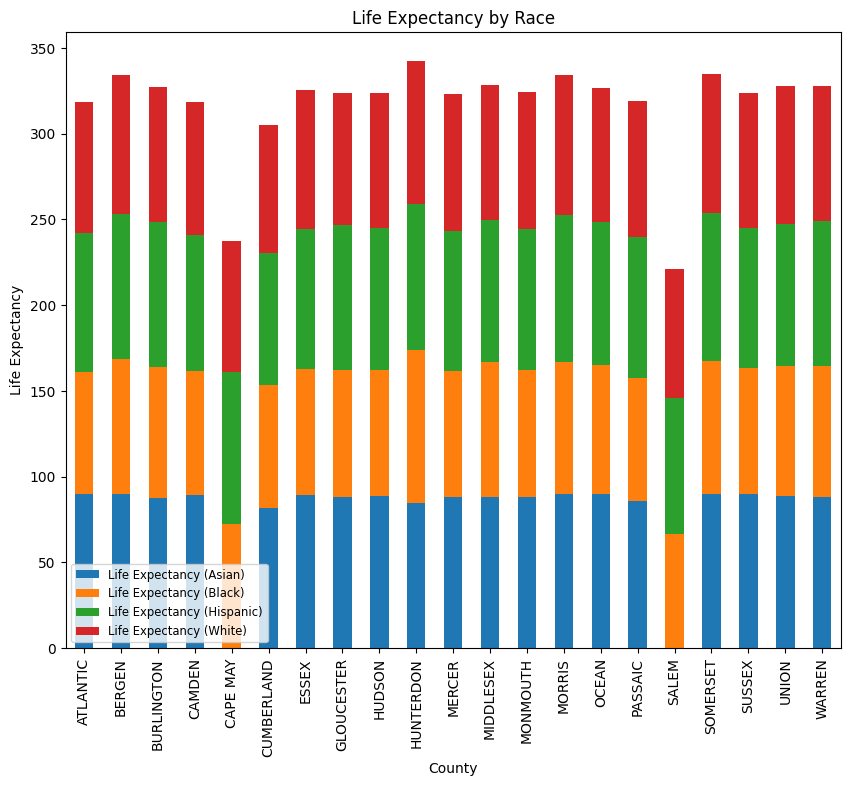

In [280]:
import matplotlib.pyplot as plt
# Assuming 'add_measures' is your DataFrame with race-specific life expectancy data
add_measures.plot(kind='bar', x='County', y=['Life Expectancy (Asian)', 'Life Expectancy (Black)',
   'Life Expectancy (Hispanic)', 'Life Expectancy (White)'], stacked=True, figsize=(10, 8))

plt.title('Life Expectancy by Race')
plt.xlabel('County')
plt.ylabel('Life Expectancy')

# You can adjust the legend location and size as needed
plt.legend(loc='lower left', fontsize='small')

plt.show()


**LIfe Expectancy**

Life expectancy is another cruicial indicator of the health and wellbeing of residents of state. A higher life expectancy has a strong association with a healthy and happy life. From the bar chart, it is evident that Asians in NJ have a higher and consistent life expectancy across counties compared to other races. The Blacks have a low life expectancy compared to other races.  

In [281]:
! wget -q -O nj_counties0.zip https://github.com/Brian13Noble/GIS/raw/main/County_Boundaries_of_N.zip
!ls
zip_ref = zipfile.ZipFile('/content/nj_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
nj_counties0=gpd.read_file('/content/County_Boundaries_of_NJ.shp') #load the shapefile with gpd as nj_counties

'Additional Measure Data.xlsx'	 County_Boundaries_of_NJ.shx   nj_counties.zip
 co-est2022-pop-34.xlsx		 County_Boundaries_of_NJ.xml  'NJ-diet and excercise.csv'
 County_Boundaries_of_NJ.cpg	'Health Care Providers.csv'    sample_data
 County_Boundaries_of_NJ.dbf	'Health insurance.csv'	       sty.jpg
 County_Boundaries_of_NJ.prj	'health sub_rankings.xlsx'
 County_Boundaries_of_NJ.shp	 nj_counties0.zip


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 21 artists>

Text(0.5, 0, 'County')

Text(0, 0.5, '#Death Rate')

Text(0.5, 1.0, 'Premature Deaths Between 2018 and 2020 (pers)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'ATLANTIC'),
  Text(1, 0, 'BERGEN'),
  Text(2, 0, 'BURLINGTON'),
  Text(3, 0, 'CAMDEN'),
  Text(4, 0, 'CAPE MAY'),
  Text(5, 0, 'CUMBERLAND'),
  Text(6, 0, 'ESSEX'),
  Text(7, 0, 'GLOUCESTER'),
  Text(8, 0, 'HUDSON'),
  Text(9, 0, 'HUNTERDON'),
  Text(10, 0, 'MERCER'),
  Text(11, 0, 'MIDDLESEX'),
  Text(12, 0, 'MONMOUTH'),
  Text(13, 0, 'MORRIS'),
  Text(14, 0, 'OCEAN'),
  Text(15, 0, 'PASSAIC'),
  Text(16, 0, 'SALEM'),
  Text(17, 0, 'SOMERSET'),
  Text(18, 0, 'SUSSEX'),
  Text(19, 0, 'UNION'),
  Text(20, 0, 'WARREN')])

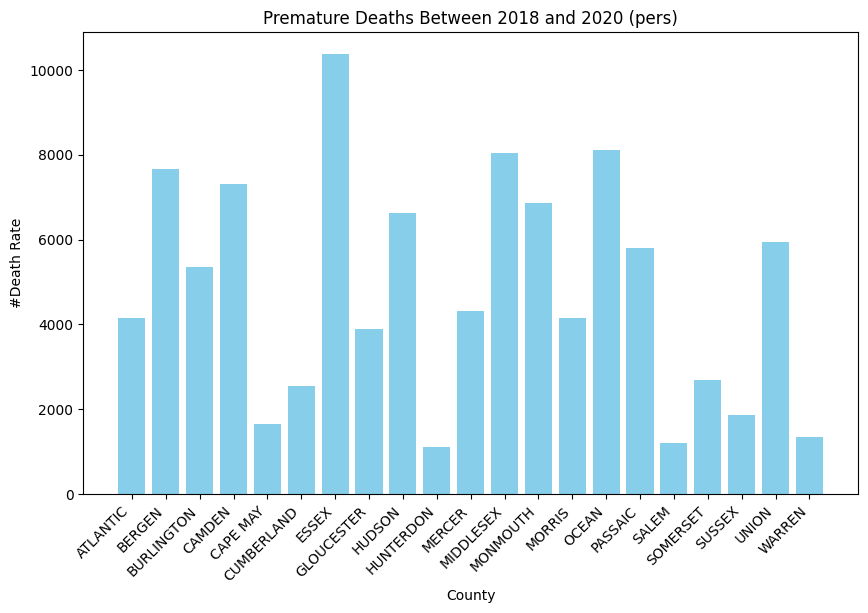

In [282]:
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(add_measures['County'], add_measures['# Deaths'], color='skyblue')
plt.xlabel('County')
plt.ylabel('#Death Rate')
plt.title('Premature Deaths Between 2018 and 2020 (pers)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


Essex, Middlesex and Ocean counties seemingly had a higher death rate while Warren, Salem and Hunterdon have significantly lower death rates.

In [283]:
#nj_counties0.dtypes

In [284]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=add_measures,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    indicator=True
)

In [285]:
#nj_counties0[['COUNTY','County','_merge']]

<Axes: >

[]

[]

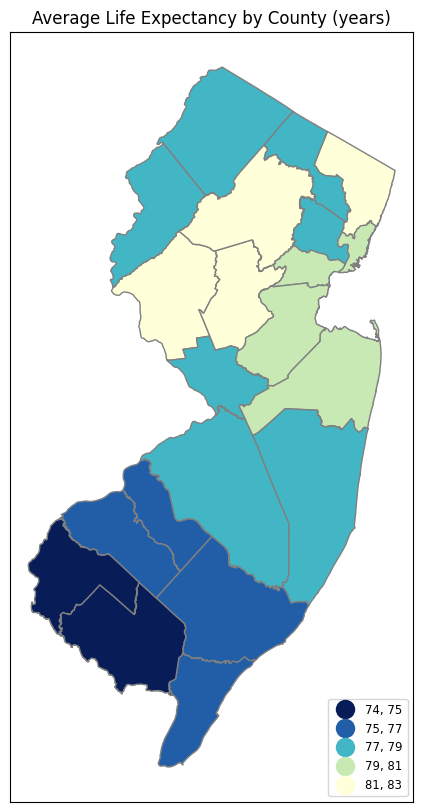

In [286]:
fig, ax = plt.subplots(1, figsize=(6,10))
nj_counties.plot(ax=ax,column='Life Expectancy',legend=True,cmap='YlGnBu_r',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text("Average Life Expectancy by County (years)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

***Life Expectancy by County***

Generally, the South-Jersey counties have the lowest life expetancy compared to the nothern counties.   

<Axes: >

[]

[]

<Axes: >

[]

[]

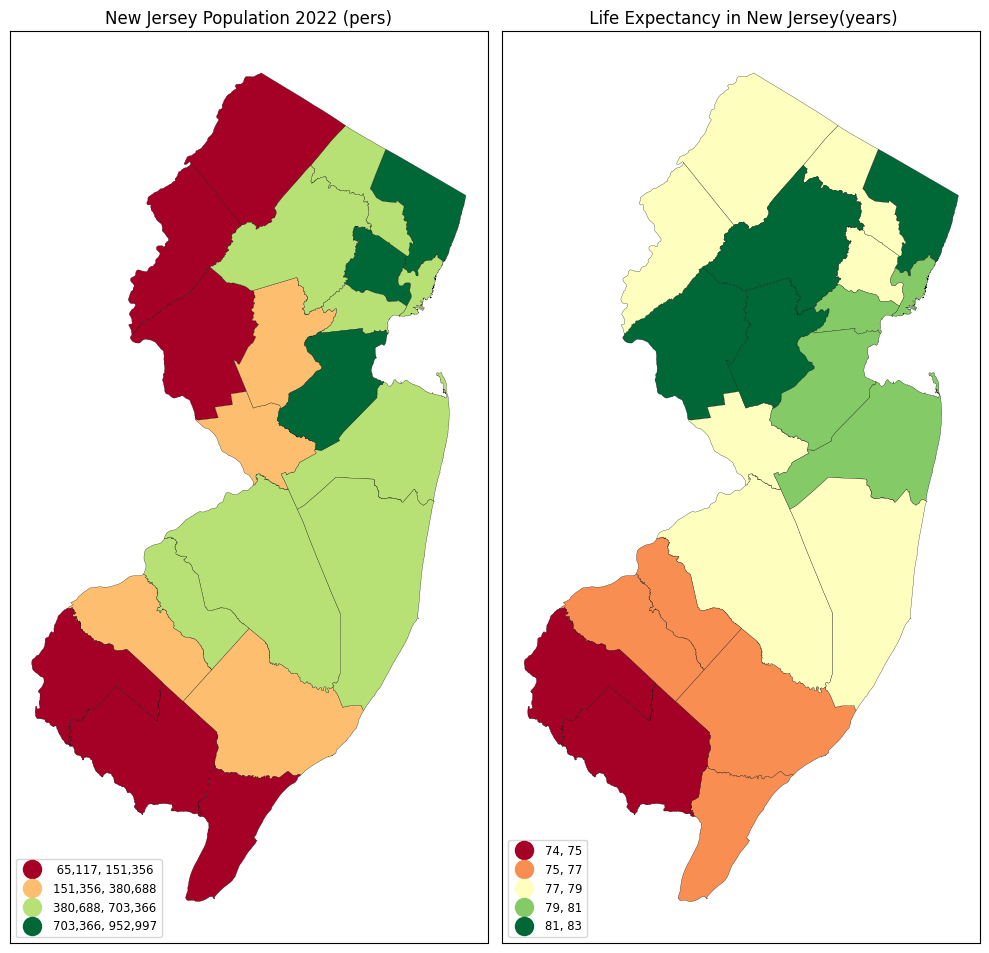

In [287]:
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
nj_counties.plot(ax=axs[0],column=2022,legend=True,cmap='RdYlGn',scheme='natural_breaks',k=4,
         edgecolor='black',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("New Jersey Population 2022 (pers)")
axs[0].set_xticks([]); axs[0].set_yticks([])


nj_counties.plot(ax=axs[1],column='Life Expectancy',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text(" Life Expectancy in New Jersey(years)")
axs[1].set_xticks([]); axs[1].set_yticks([])

There is a significant relationship between the population and the life expectancy. South Jersey couunties that are less densely populated have a lower ife expectancy. However, Hunterdon and Somerset have a higher life expectancy despite being less densely populated.   

In [288]:
file_path = '/content/health sub_rankings.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
  ! wget -q https://github.com/Brian13Noble/GIS/raw/main/health%20sub_rankings.xlsx

# Now read the Excel file into a DataFrame
sub_ranks = pd.read_excel(file_path, skiprows=2)

In [289]:
#sub_ranks

In [290]:
#pd.set_option('display.max_columns', 30)

In [291]:
sub_ranks= sub_ranks[['Unnamed: 2','Unnamed: 7','Unnamed: 8']]
sub_ranks= sub_ranks.iloc[0:,:]
#sub_ranks

In [292]:
sub_ranks.rename(columns={'Unnamed: 2': 'County'}, inplace=True)
sub_ranks.rename(columns={'Unnamed: 7': 'Z-Score'}, inplace=True)
sub_ranks.rename(columns={'Unnamed: 8': 'Rank'}, inplace=True)

In [293]:
sub_ranks

,County,Z-Score,Rank
0,Atlantic,0.28,19
1,Bergen,-0.31,3
2,Burlington,-0.06,9
3,Camden,0.17,17
4,Cape May,0.18,18
5,Cumberland,0.51,21
6,Essex,0.08,15
7,Gloucester,0.04,12
8,Hudson,-0.06,8
9,Hunterdon,-0.27,4


<Axes: ylabel='County'>

Text(0.5, 1.0, 'Rankings of Counties based on Health Behaviors')

Text(0.5, 0, 'Rank')

Text(0, 0.5, 'County')

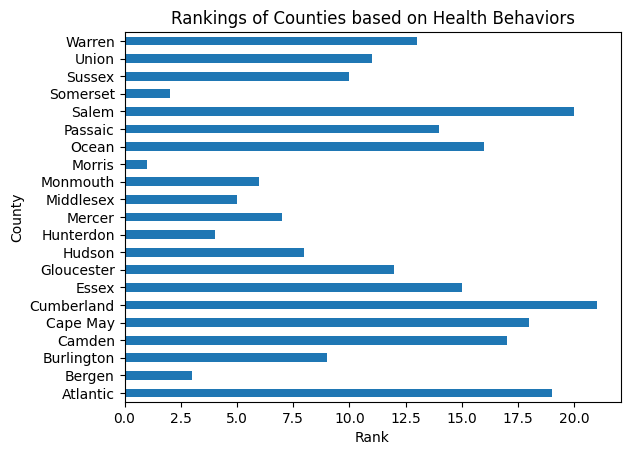

In [294]:
# Assuming 'data' is a DataFrame with ranks
sub_ranks.plot(kind='barh', x='County', y='Rank', legend=False)
plt.title('Rankings of Counties based on Health Behaviors')
plt.xlabel('Rank')
plt.ylabel('County')
plt.show()


Morris, Somerset and Bergen are the top three counties with better health behaviors.

In [295]:
file_path = '/content/Health Care Providers.csv'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
  ! wget -q https://github.com/Brian13Noble/GIS/raw/main/Health%20Care%20Providers.csv

# Now read the Excel file into a DataFrame
health_providers = pd.read_csv(file_path)

In [296]:
#health_providers

In [297]:
health_providers= health_providers[['County','Primary Care Physicians (PCP)','Mental Health Providers (MHP)',
                      'Dentists','Rate per 100,000 Population' ]]


In [298]:
health_providers['County'] = health_providers['County'].str.replace('County','', regex=True)
health_providers['County'] = health_providers['County'].str.upper()

In [299]:
health_providers['total_providers'] =(health_providers['Primary Care Physicians (PCP)'] + health_providers['Mental Health Providers (MHP)']
+health_providers['Dentists'])

In [300]:
#health_providers['County'] = health_providers['County'].str.rstrip()

In [301]:
health_providers.rename(columns={'County': 'Geo_Name'}, inplace=True)

In [302]:
health_providers.dtypes

Geo_Name                          object
Primary Care Physicians (PCP)      int64
Mental Health Providers (MHP)      int64
Dentists                           int64
Rate per 100,000 Population      float64
total_providers                    int64
dtype: object

In [303]:
health_providers['Geo_Name'] = health_providers['Geo_Name'].str.rstrip()
health_providers['Geo_Name'] = health_providers['Geo_Name'].str.lstrip()

In [304]:
health_providers


,Geo_Name,Primary Care Physicians (PCP),Mental Health Providers (MHP),Dentists,"Rate per 100,000 Population",total_providers
0,ATLANTIC,211,519,165,80.24,895
1,BERGEN,1110,2765,1263,119.30,5138
2,BURLINGTON,377,4425,343,84.42,5145
3,CAMDEN,509,1890,421,100.43,2820
4,CAPE MAY,51,115,56,55.71,222
5,CUMBERLAND,62,183,100,42.17,345
6,ESSEX,673,2083,772,84.07,3528
7,GLOUCESTER,168,432,135,57.29,735
8,HUDSON,363,585,458,54.04,1406
9,HUNTERDON,150,355,107,120.20,612


<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='Geo_Name'>

Text(0.5, 1.0, 'Comparison of PCP and MHP by County')

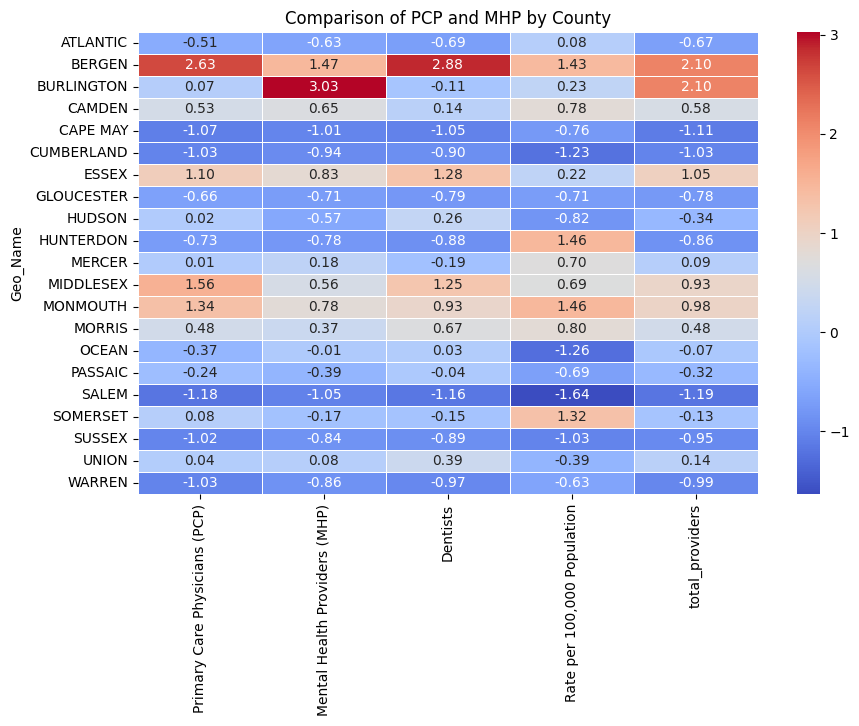

In [305]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set 'County' as the index for better visualization
health_providers.set_index('Geo_Name', inplace=True)

# Normalize the data (optional, but it helps in comparing values on the same scale)
health_providers_normalized = (health_providers - health_providers.mean()) / health_providers.std()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(health_providers_normalized, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Comparison of PCP and MHP by County')
plt.show()


Bergen county has the highest number of primary heathcare providers, Burlington the highest number of mental health providers while Bergen county has more dentists compared to other counties. Therefore, mental health is a concerning problem in Burlington.     

In [306]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=health_providers,
    left_on='COUNTY',
    right_on='Geo_Name',
    how='outer',
    indicator=True
)

In [307]:
#nj_counties[['COUNTY','Geo_Name','_merge']]

In [308]:
#import numpy as np
HcP = nj_counties.copy()
HcP["geometry"] = HcP["geometry"].centroid


<Axes: >

[]

[]

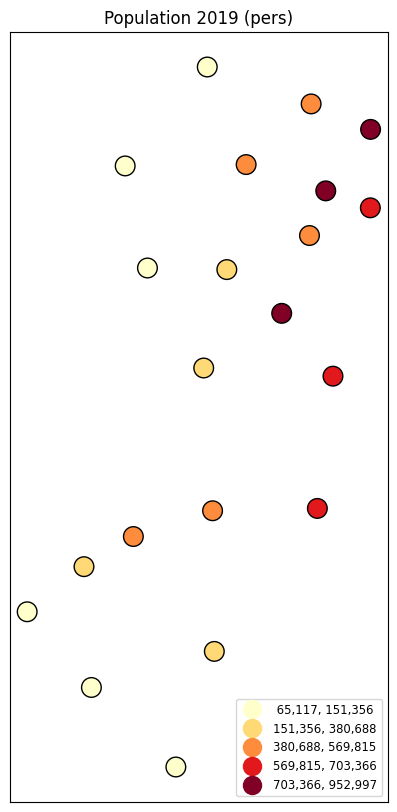

In [309]:
filterig, ax = plt.subplots(1, figsize=(6,10))
HcP.plot(ax=ax,column= 2022,legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Population 2019 (pers)")
ax.set_xticks([]); ax.set_yticks([])

<Axes: >

<Axes: >

[]

[]

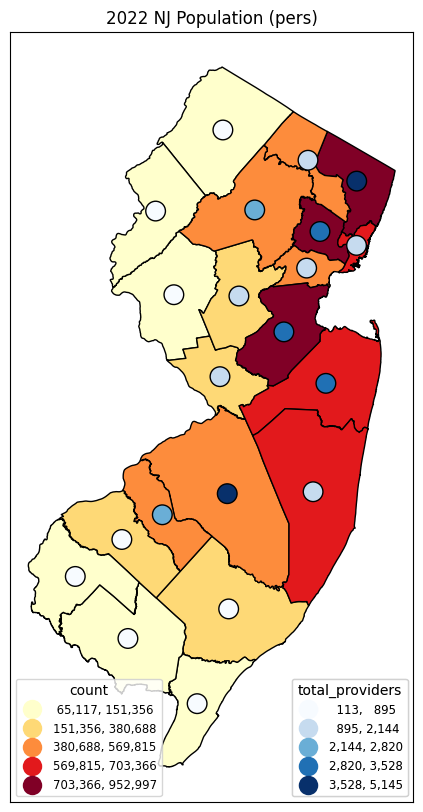

In [310]:
fig, ax = plt.subplots(1, figsize=(10,10))
nj_counties.plot(ax=ax,column=2022,legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''count''')

HcP.plot(ax=ax,column='total_providers',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #

ax.title.set_text("2022 NJ Population (pers)")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title(''' Number of healthcare Providers''')



ax.add_artist(l2)
ax.add_artist(l1)
l2.set_title('''total_providers''')


The number of health care providers varies from county to another based on the total population. Counties with more healthcare providers seem to have a higher life expectancy compared to those with less. However, despite having a low population and few number of health care providers, Hunterdon seems to have a high life expectancy.  

In [311]:
file_path = '/content/Health insurance.csv'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
  ! wget -q https://github.com/Brian13Noble/GIS/raw/main/Health%20insurance.csv
# Now read the Excel file into a DataFrame
health_insurance = pd.read_csv(file_path, skiprows=0)

In [312]:
#health_insurance

In [313]:
health_insurance['Geo_NAME'] = health_insurance['Geo_NAME'].str.rstrip()
health_insurance['Geo_NAME'] = health_insurance['Geo_NAME'].str.lstrip()

In [314]:
health_insurance= health_insurance[['Geo_NAME','Persons Without Insurance (Population Under 65 Years, 2013 est.)']]

In [315]:
health_insurance['Geo_NAME'] = health_insurance['Geo_NAME'].str.replace('County','', regex=True)
health_insurance['Geo_NAME'] = health_insurance['Geo_NAME'].str.upper()

In [316]:
health_insurance['Geo_NAME'] = health_insurance['Geo_NAME'].str.strip()

In [317]:
health_insurance

,Geo_NAME,"Persons Without Insurance (Population Under 65 Years, 2013 est.)"
0,ATLANTIC,12.95
1,BERGEN,10.12
2,BURLINGTON,7.01
3,CAMDEN,10.01
4,CAPE MAY,10.76
5,CUMBERLAND,15.38
6,ESSEX,14.86
7,GLOUCESTER,6.66
8,HUDSON,16.15
9,HUNTERDON,5.81


In [318]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=health_insurance,
    left_on='COUNTY',
    right_on='Geo_NAME',
    how='outer',
    indicator=True
)

In [319]:
nj_counties[['COUNTY','Geo_NAME','_merge']]

,COUNTY,Geo_NAME,_merge
0,ATLANTIC,ATLANTIC,both
1,BERGEN,BERGEN,both
2,BURLINGTON,BURLINGTON,both
3,CAMDEN,CAMDEN,both
4,CAPE MAY,CAPE MAY,both
5,CUMBERLAND,CUMBERLAND,both
6,ESSEX,ESSEX,both
7,GLOUCESTER,GLOUCESTER,both
8,HUDSON,HUDSON,both
9,HUNTERDON,HUNTERDON,both


In [320]:
#nj_counties.dtypes

<Axes: >

[]

[]

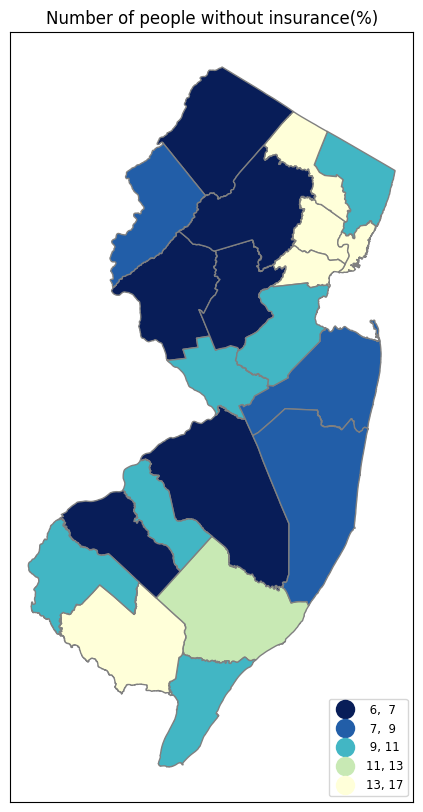

In [321]:
fig, ax = plt.subplots(1, figsize=(6,10))
nj_counties.plot(ax=ax,column='Persons Without Insurance (Population Under 65 Years, 2013 est.)',legend=True,cmap='YlGnBu_r',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text("Number of people without insurance(%)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

In [322]:
file_path = '/content/NJ-diet and excercise.csv'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
  ! wget -q https://github.com/Brian13Noble/GIS/raw/main/NJ-diet%20and%20excercise.csv

# Now read the Excel file into a DataFrame
diet_excercise = pd.read_csv(file_path)

In [323]:
# Assuming 'df' is the name of your DataFrame
diet_excercise.columns = diet_excercise.columns.str.strip()


In [324]:
diet_excercise = diet_excercise[['County',
                                 'Persons with Limited Access to Healthy Foods',
                                 'Persons with Access to Exercise Opportunities',
                                 'Obese Persons (20 Years and Over)',
                                 'Physically Inactive Persons (20 Years and Over)']]


In [325]:
diet_excercise['County'] = diet_excercise['County'].str.replace('County', '', regex=True)

In [326]:
diet_excercise

,County,Persons with Limited Access to Healthy Foods,Persons with Access to Exercise Opportunities,Obese Persons (20 Years and Over),Physically Inactive Persons (20 Years and Over)
0,Atlantic,7.82,93.12,32.40,22.50
1,Bergen,0.89,99.46,22.90,18.20
2,Burlington,5.03,93.03,30.00,18.40
3,Camden,4.45,93.52,30.90,21.90
4,Cape May,8.74,89.72,29.40,19.20
5,Cumberland,11.68,86.71,35.70,30.80
6,Essex,0.75,99.71,29.10,25.50
7,Gloucester,6.47,88.24,32.10,18.70
8,Hudson,0.12,100.00,25.70,25.20
9,Hunterdon,2.63,91.47,25.10,14.90


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 21 artists>

Text(0.5, 0, 'County')

Text(0, 0.5, 'Persons with Limited Access to Healthy Foods')

Text(0.5, 1.0, 'Persons with Limited Access to Healthy Foods(percent)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Atlantic '),
  Text(1, 0, 'Bergen '),
  Text(2, 0, 'Burlington '),
  Text(3, 0, 'Camden '),
  Text(4, 0, 'Cape May '),
  Text(5, 0, 'Cumberland '),
  Text(6, 0, 'Essex '),
  Text(7, 0, 'Gloucester '),
  Text(8, 0, 'Hudson '),
  Text(9, 0, 'Hunterdon '),
  Text(10, 0, 'Mercer '),
  Text(11, 0, 'Middlesex '),
  Text(12, 0, 'Monmouth '),
  Text(13, 0, 'Morris '),
  Text(14, 0, 'Ocean '),
  Text(15, 0, 'Passaic '),
  Text(16, 0, 'Salem '),
  Text(17, 0, 'Somerset '),
  Text(18, 0, 'Sussex '),
  Text(19, 0, 'Union '),
  Text(20, 0, 'Warren ')])

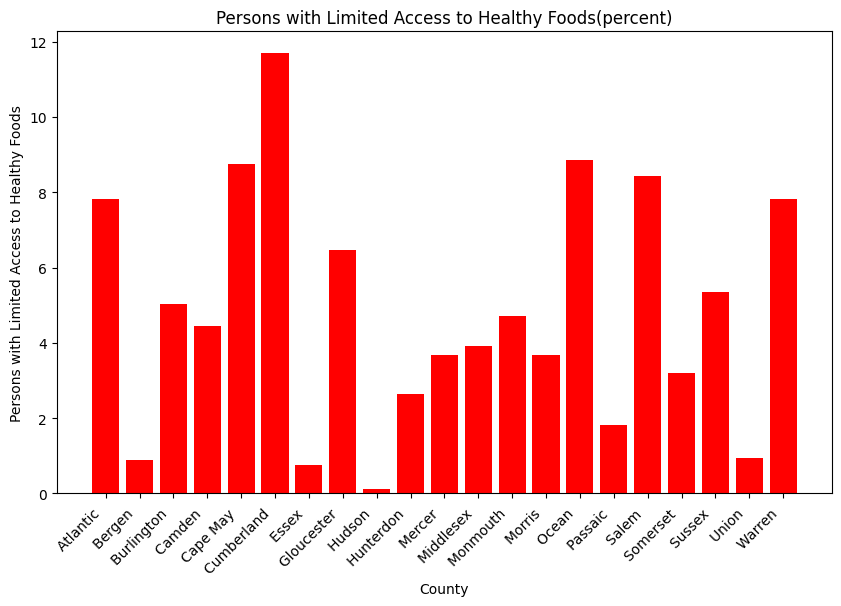

In [327]:
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(diet_excercise['County'], diet_excercise['Persons with Limited Access to Healthy Foods'], color='red')
plt.xlabel('County')
plt.ylabel('Persons with Limited Access to Healthy Foods')
plt.title('Persons with Limited Access to Healthy Foods(percent)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Cumberland, Ocean, Cape May, and Atlantic, and Warren are counties with the highest percentage of number of people with limited access to healthy foods.  

**Conclusion**

In retrospect, Nothern NJ counties have better health and life outcomes compared to those in the South. Nothern counties are more densely populated and are characterized by a higher life expectancy, an increase in access to healthy foods, and are ranked top in terms of health behaviors.    

**Resources**:
1. https://hub.arcgis.com/datasets/newjersey::county-boundaries-of-nj/explore
2. https://www.countyhealthrankings.org/explore-health-rankings/new-jersey/data-and-resources
3. https://www.socialexplorer.com/explore-maps

